logp = -0.00039386, ||grad|| = 0.0015751: 100%|██████████████████████████████████████| 20/20 [00:00<00:00, 1173.45it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta_logodds__]
The number of effective samples is smaller than 25% for some parameters.


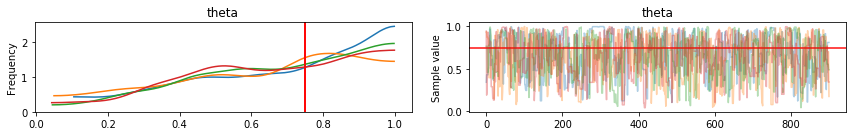

In [17]:
import numpy as np
import pymc3 as pm
import theano
import scipy.stats as stats
from multiprocessing import Process
np.random.seed(123)
exs = 4
real = 0.75
data = stats.bernoulli.rvs(p=real, size=exs)
with pm.Model() as model1:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)
    start = pm.find_MAP()
    step = pm.Metropolis(scaling=1)
    trace = pm.sample(1000, step=step, start=start)
    #burnin = 100
    #chain = trace[burnin:]
    pm.traceplot(chain, lines={'theta': real})

In [18]:
pm.summary(chain)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.652012,0.243832,0.008993,0.202394,0.999305,654.0,1.003649


In [19]:
pm.gelman_rubin(chain)

{'theta': 1.003648595184296}

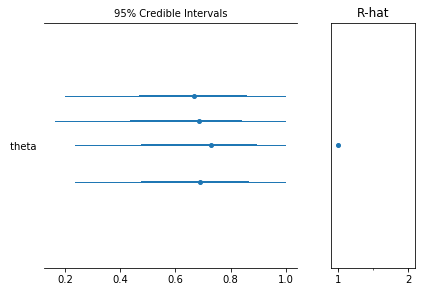

In [22]:
pm.forestplot(chain)